# Homework Assignment 4 - Chem 277B
## Diabetes Prediction

### 1) Objective

Analyze the Diabetes dataset using linear regression techniques to predict disease progression based on various health metrics.

### 2) Preparation

Before starting, import the necessary libraries for data analysis and visualization. 

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import probplot

from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

from statsmodels.api import add_constant, OLS, Logit, GLM, families, stats

Load the dataset from `sklearn`, which contains various health metrics and a target variable indicating disease progression.

In [63]:
data, target = load_diabetes(return_X_y=True, as_frame=True, scaled=True)
feature_names = ['age', 'sex', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']
data.columns = feature_names

Split the dataset into training (80%) and testing (20%) sets this time. Use `random_state=42` for reproducibility. The dataset is already scaled.

In [65]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

print(f'Shape of training features: {X_train.shape}')
print(f'Shape of training labels: {y_train.shape}')
print(f'Shape of test features: {X_test.shape}')
print(f'Shape of test labels: {y_test.shape}')

Shape of training features: (353, 10)
Shape of training labels: (353,)
Shape of test features: (89, 10)
Shape of test labels: (89,)


### 3) Visualization

Visualize the dataset using pair plots to understand the relationships between features. Discuss any patterns or correlations you observe.

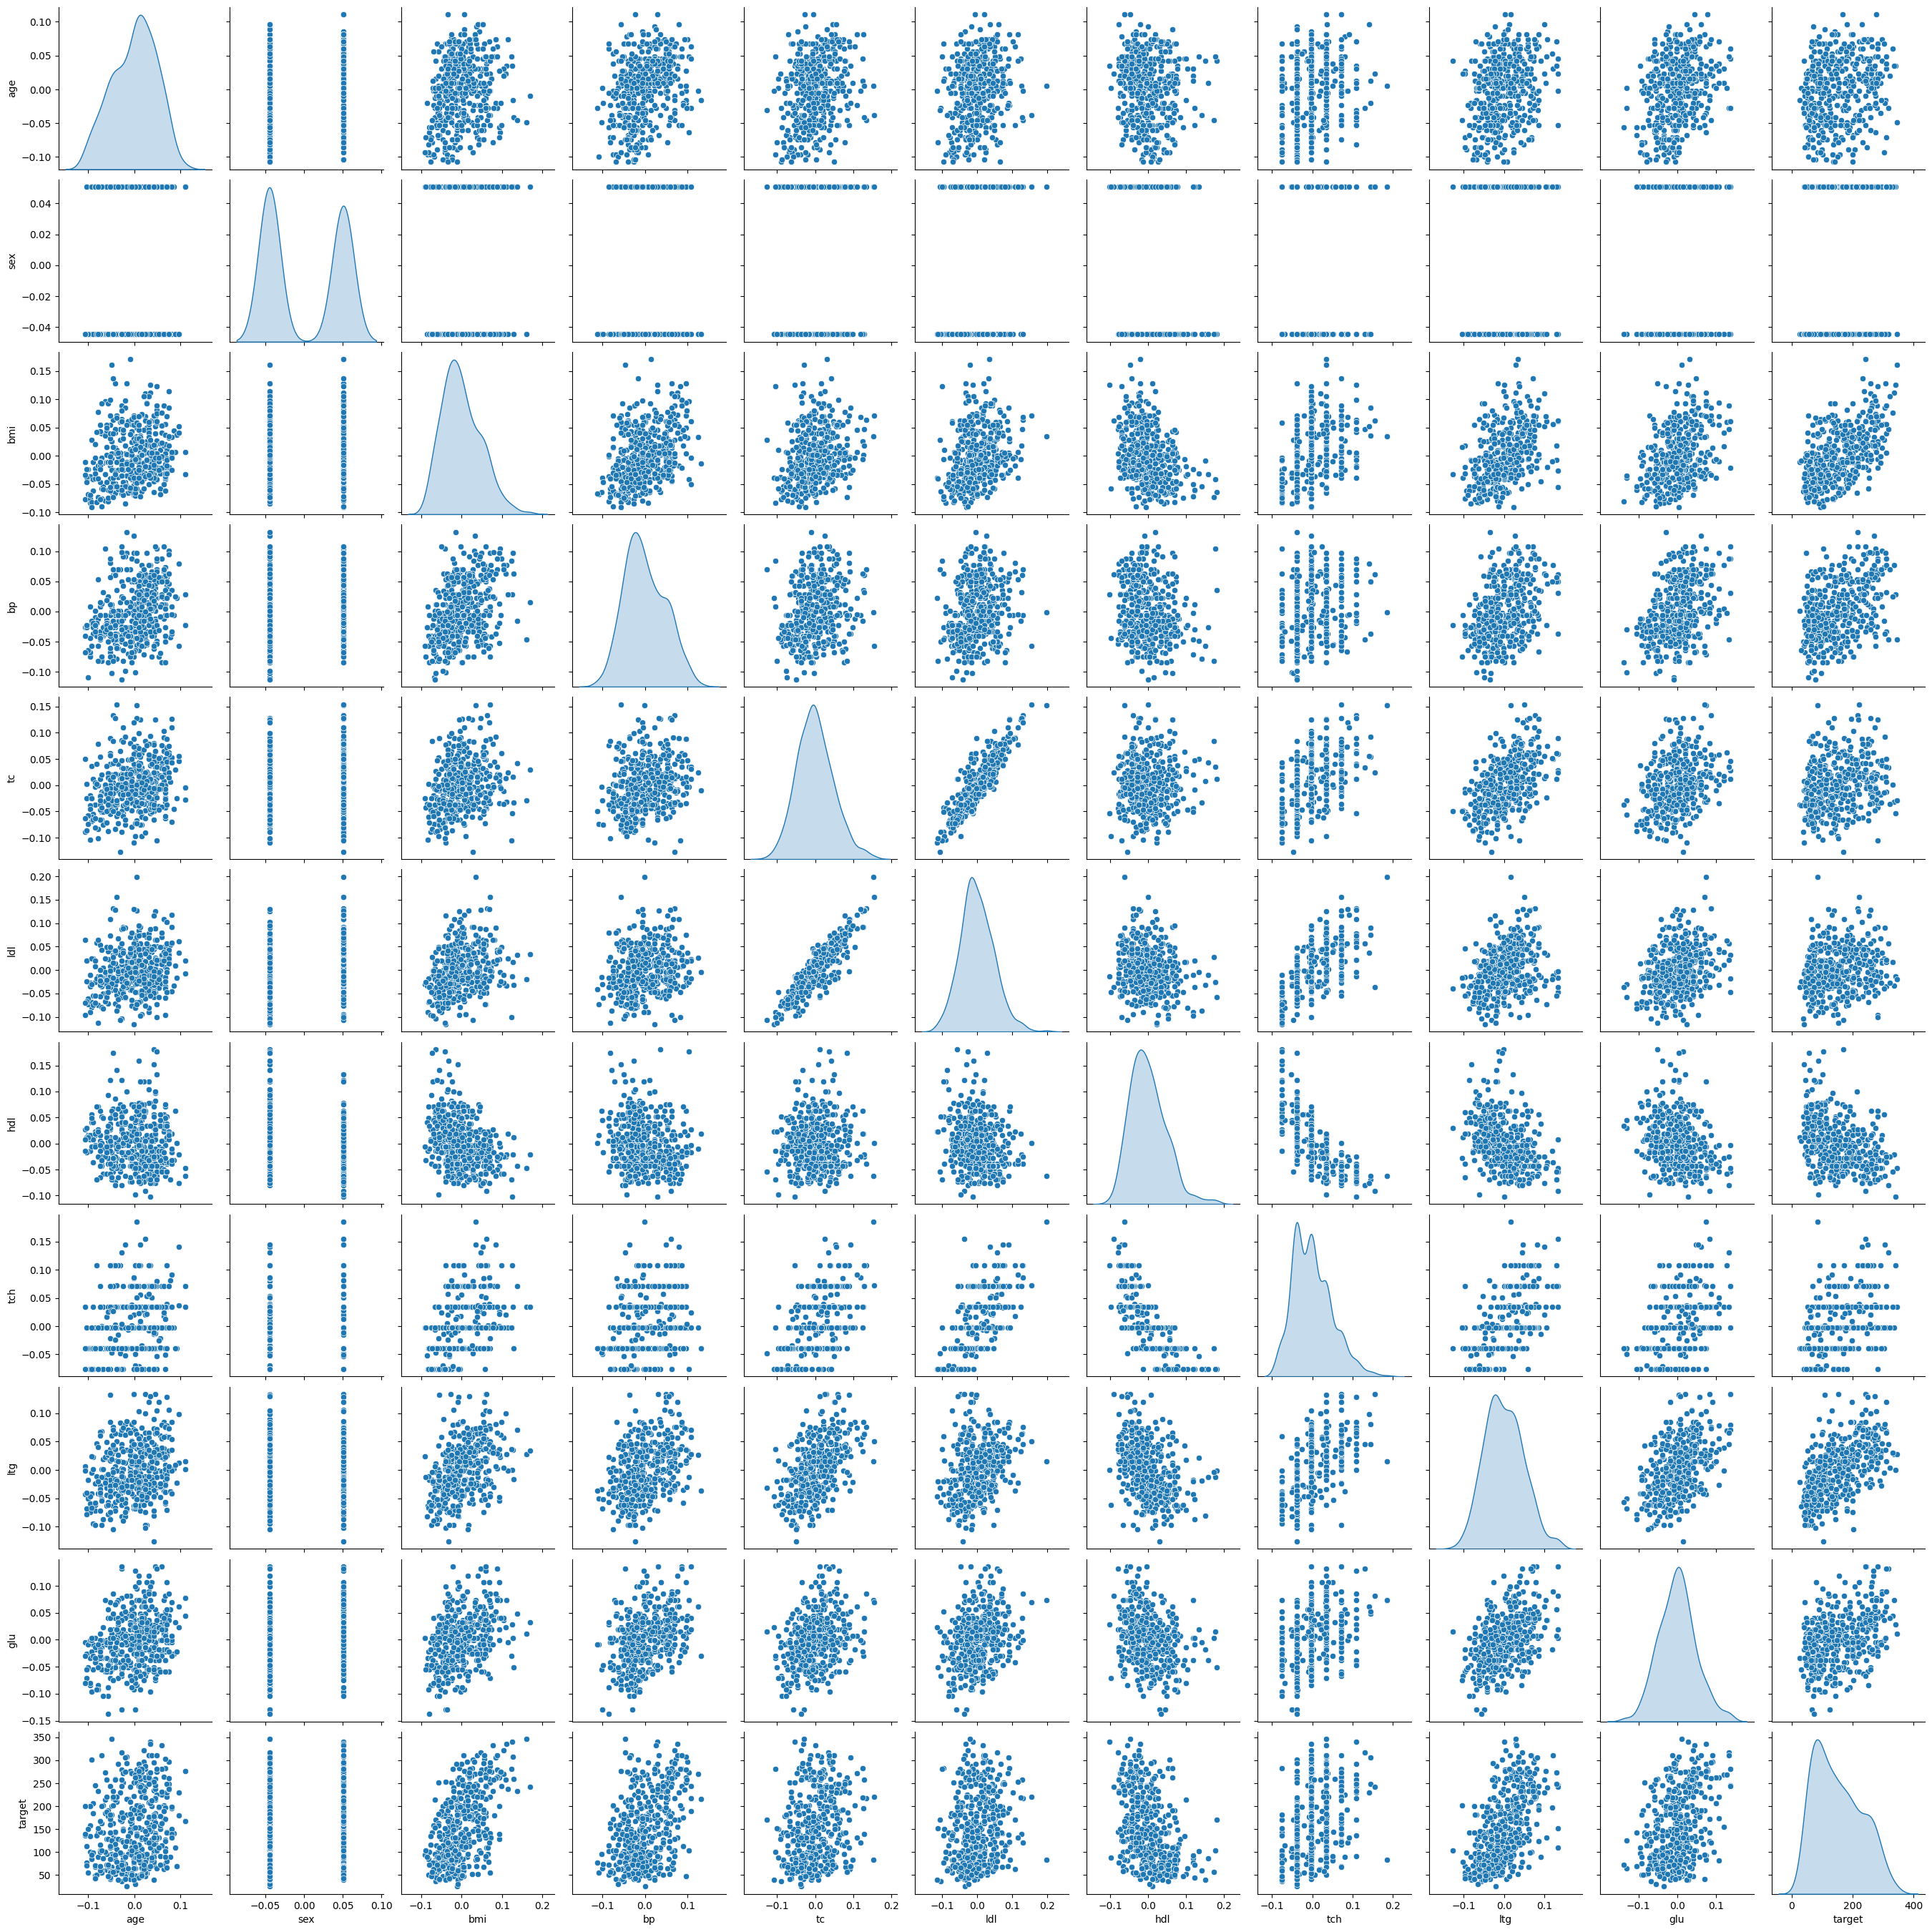

In [4]:
######## Fill in the code below ########
table = data.copy()
table['target'] = target

sns.pairplot(table, diag_kind='kde')
plt.show()
########################################

> All features are roughly normally distributed except for sex which is binary. This suggests that a linear model may be appropriate for this data, as linear models assume normally distributed errors. All features are weakly correlated with the target variable.

Visualize the dataset using two principal components to see if the target variable can be separated.

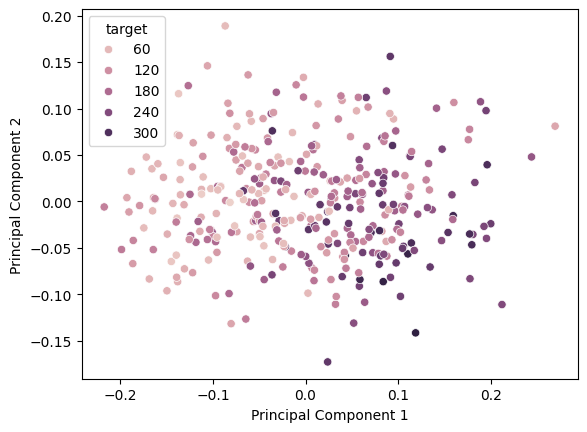

In [5]:
######## Fill in the code below ########
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
########################################

sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

> The target variable shows some separation along the first principal component, but there is still significant overlap between different target values. This suggests that some predictive power may be possible, but it may not be very strong.

### 4) Linear Regression

Perform linear regression using the training set to predict the target variable. Remember to add the intercept. Discuss the your fitting results, including R-squared value, coefficients, and p-values.<br>
**Note, scaling/normalizing the data is not necessary here.**<br>
One feature, sex, is a **categorical**. For now, we want to treat this feature like all the other features, but what would you need to do in order to  represent this feature numerically?

In [91]:
######## Fill in the code below ########
X_train_const = add_constant(X_train)
X_test_const = add_constant(X_test)
model = OLS(y_train, X_train_const).fit()
#model = GLM(y_train, X_train_const, family=families.Gaussian()).fit()  # Alternative using GLM
########################################

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     38.25
Date:                Mon, 22 Sep 2025   Prob (F-statistic):           5.41e-50
Time:                        01:47:20   Log-Likelihood:                -1906.1
No. Observations:                 353   AIC:                             3834.
Df Residuals:                     342   BIC:                             3877.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.3456      2.902     52.155      0.0

> Our R-squared value is around 0.5, indicating that the model explains about half of the variance in the target variable compared to a simple mean model. <br>
> The coefficients for each feature indicate their contribution to the prediction, with some features having a positive impact and others negative. The most influential features appear to be tc, ltg, and bmi, while age and glu have less impact. But note that the errors of some coefficients are quite large, indicating uncertainty in these estimates.<br>
> The p-values suggest that some features are statistically significant predictors of the target variable. In particular, bmi, sex, bp, and ltg have very low p-values, indicating strong evidence against the null hypothesis (that their coefficients are zero). Age, glu, and hdl, on the other hand, have higher p-values, suggesting they may not be as important for predicting the target variable. This is consistent with the correlation analysis from the visualization step.<br>
> **Categorical features** can be numerically represented using dummy variables (one-hot encoding), e.g. df_dummies = pd.get_dummies(df, columns=['sex']) 

Plot the residuals of the model. Discuss whether the residuals appear to be normally distributed.

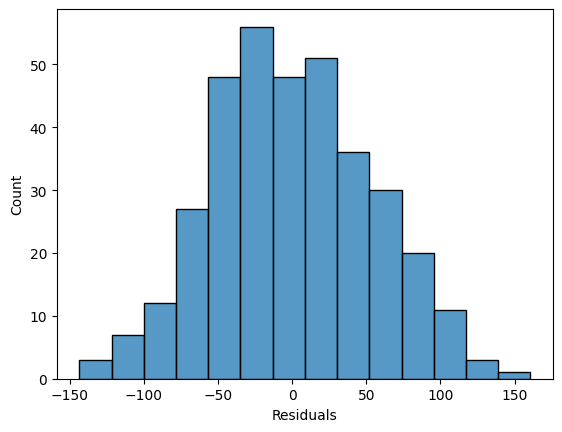

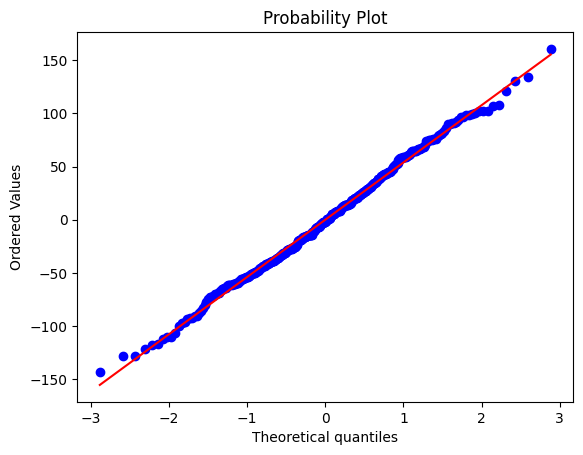

In [93]:
######## Fill in the code below ########
sns.histplot(model.resid)
plt.xlabel('Residuals')
plt.show()

probplot(model.resid, dist='norm', plot=plt)
plt.show()
########################################

> The residuals appear to be roughly normally distributed. This suggests that the linear regression model is a reasonable fit for the data, as one of the assumptions of linear regression is that the residuals are normally distributed.

Plot the predictions against the true values for both training and testing sets. Calculate and report the Mean Absolute Error (MAE) for both sets. Discuss the model's performance and any potential overfitting or underfitting issues.

Train MAE: 43.4835035239804
Test MAE: 42.79409467959991


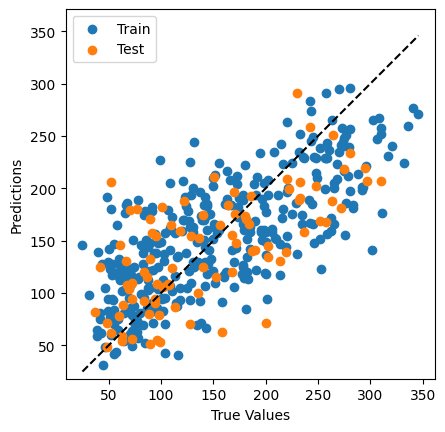

In [8]:
######## Fill in the code below ########
y_train_pred = model.predict(X_train_const)
y_test_pred = model.predict(X_test_const)


print('Train MAE:', np.mean(np.abs(y_train - y_train_pred)))
print('Test MAE:', np.mean(np.abs(y_test - y_test_pred)))

plt.figure()
plt.scatter(y_train, y_train_pred, label='Train')
plt.scatter(y_test, y_test_pred, label='Test')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('square')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.legend()
plt.show()
########################################

> Both training and testing sets show a positive correlation between predicted and true values, indicating that the model is capturing some of the underlying patterns in the data. The training set has roughly the same MAE as the testing set, suggesting that the model is not overfitting and generalizes well to unseen data.

### 5) Logistic Regression

Classify the target variable into two classes: above and below 150.

In [9]:
y_train_cat = (y_train > 150).astype(int)
y_test_cat = (y_test > 150).astype(int)

Use Gaussian Naive Bayes to classify the data. Report the accuracy and confusion matrix. Discuss the model's performance and any potential limitations.

Accuracy: 0.7528089887640449


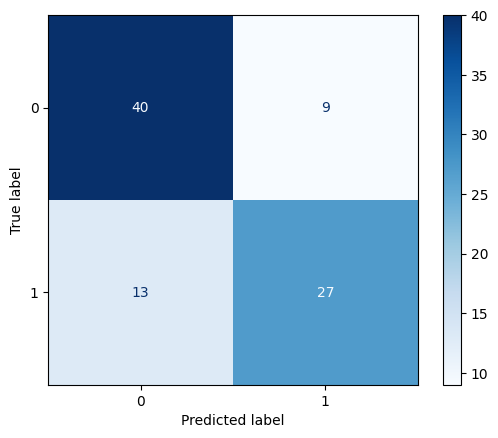

In [10]:
######## Fill in the code below ########
gnb = GaussianNB()
gnb.fit(X_train, y_train_cat)
y_test_cat_pred = gnb.predict(X_test)

print('Accuracy:', np.mean(y_test_cat_pred == y_test_cat))
cm = confusion_matrix(y_test_cat, y_test_cat_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()
########################################

> Gaussian Naive Bayes achieved an accuracy of around 0.75, predicting well on negatives but struggling more with positives. The model assumes feature independence, which may not hold true here, potentially limiting performance. However, from the correlation analysis, the most correlated features are tc and ldl, which are not very correlated with the target variable and will not play a big role in the classification, meaning that the independence assumption may not be too detrimental in this case.

Use logistic regression to classify the data. Report the accuracy and confusion matrix. Discuss the model's performance and fitting results.

Optimization terminated successfully.
         Current function value: 0.467983
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  353
Model:                          Logit   Df Residuals:                      342
Method:                           MLE   Df Model:                           10
Date:                Fri, 19 Sep 2025   Pseudo R-squ.:                  0.3206
Time:                        23:20:48   Log-Likelihood:                -165.20
converged:                       True   LL-Null:                       -243.14
Covariance Type:            nonrobust   LLR p-value:                 2.297e-28
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3573      0.144     -2.482      0.013      -0.639      -0.075
age            1.1027      3.

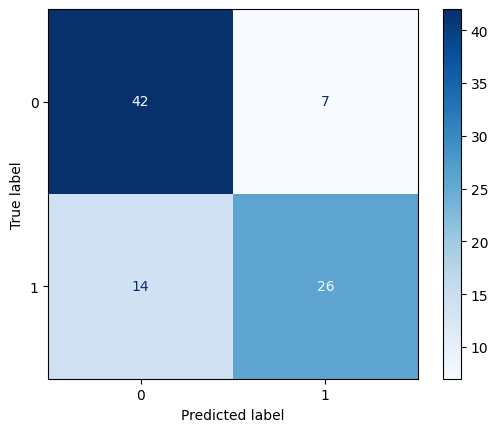

In [ ]:
######## Fill in the code below ########
model = Logit(y_train_cat, X_train_const).fit()
# model = GLM(y_train_cat, X_train_const, family=families.Binomial()).fit()  # Alternative using GLM
y_test_cat_pred = (model.predict(X_test_const) > 0.5).astype(int)

print(model.summary())
print('Accuracy:', np.mean(y_test_cat_pred == y_test_cat))
cm = confusion_matrix(y_test_cat, y_test_cat_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()
########################################

> The logistic regression model achieved a slightly higher accuracy of around 0.76. Looking into the coefficients and p-values, we again see that the most significant features are bmi, sex, bp, and ltg, consistent with the linear regression results. The model still struggles more with predicting positives.

For each class, plot the histogram of the predicted probabilities. Discuss how well the model separates the two classes.

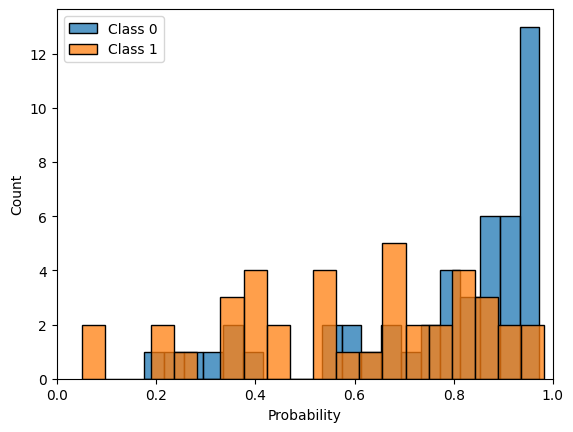

In [12]:
######## Fill in the code below ########
y_test_cat_prob = model.predict(X_test_const)

sns.histplot(x=1 - y_test_cat_prob[y_test_cat == 0], label='Class 0', bins=20)
sns.histplot(x=y_test_cat_prob[y_test_cat == 1], label='Class 1', bins=20)
plt.xlabel('Probability')
plt.ylabel('Count')
plt.xlim(0, 1)
plt.legend()
plt.show()
########################################

> For negatives, the predicted probabilities are mostly close to 1, indicating high confidence in these predictions. For positives, the probabilities are more spread out, with many predictions close to 0.5, indicating uncertainty.